In [1]:
# import some keras and basic module 

from __future__ import print_function 
import tensorflow.keras as keras

# data set cifar 10 
from tensorflow.keras.datasets import cifar10 

# basic preprocesssing for image data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# construct neural network 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 

from tensorflow.keras.layers import Conv2D, MaxPooling2D

import os 

import numpy as np 

import matplotlib.pyplot as plt

from tensorflow.keras.utils import plot_model

import tensorflow as tf 
config = tf.ConfigProto()
tf.enable_eager_execution(config=config)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:

## basic parameters 
batch_size = 32 
num_classes = 10 
num_epochs = 200 
is_data_augmentation = False 
model_dir = 'models'
model_filename = 'LeNet5_6_bias.h'



In [3]:
#read data and split data into train and test set

(train_set,train_label),(test_set,test_label) = cifar10.load_data() 

print('the shape of training data set is: ',train_set.shape) 

# print number of train and test samples 

# train samples 50000
#print(train_set.shape[0] , 'train samples') 

# test samples 10000
#print(test_set.shape[0] , 'test samples') 

#print(train_label)

the shape of training data set is:  (50000, 32, 32, 3)


In [4]:
# Convert class label to binary vector 
train_label = keras.utils.to_categorical(train_label,num_classes)
test_label  = keras.utils.to_categorical(test_label,num_classes) 
print(train_label.shape)
print(test_label.shape)

(50000, 10)
(10000, 10)


the code input for Conv2D 
```
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
    dilation_rate=(1, 1), activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs
)
```

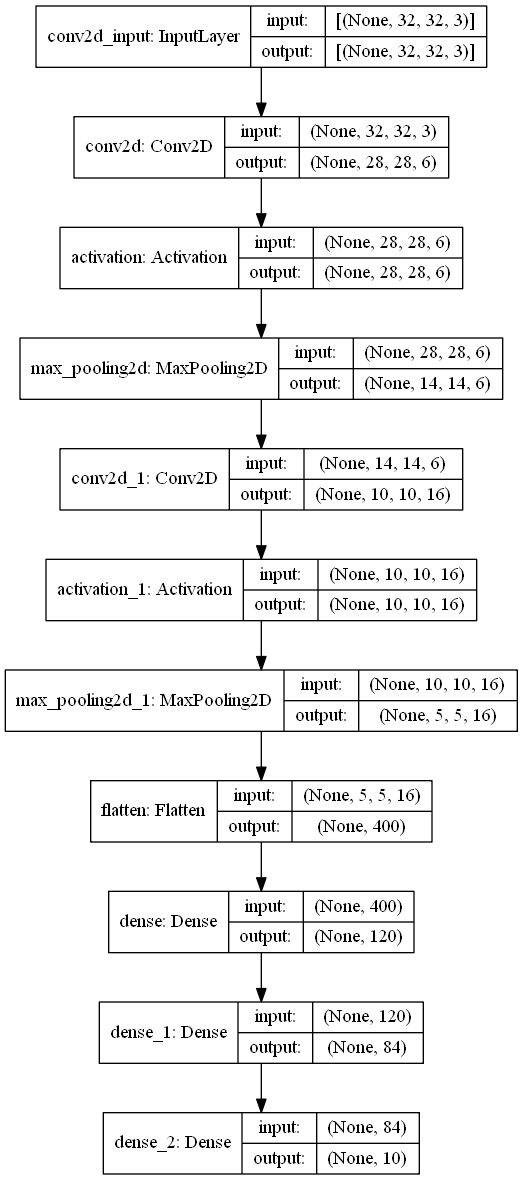

In [5]:
# construct the model 

cnn_model = Sequential() 


# convolutional layer stride 1 no padding nfilters = 6 input_shape = 32*32*3
# acitvation = softmax
cnn_model.add(Conv2D(6,(5,5),padding='valid',input_shape=train_set.shape[1:], ))
cnn_model.add(Activation('relu'))

# max-pooling layer window size 2*2
cnn_model.add(MaxPooling2D(pool_size = (2,2)))

# convolutional layer stride 1 no padding nfilters = 6 input_shape = 14*14*6
# activation = softmax
cnn_model.add(Conv2D(16,(5,5),padding ='valid'))
cnn_model.add(Activation('relu'))

# max-pooling layer window size 2*2
cnn_model.add(MaxPooling2D(pool_size =(2,2) ))

# weights = cnn_model.layers[0].get_weights()[0]
# bias = cnn_model.layers[0].get_weights()[1]
# print(weights.shape)
# print(bias.shape)
# flatten 2d to 1d 

cnn_model.add(Flatten())


# full connected layer nfilters = 120 add bias

cnn_model.add(Dense(120,use_bias = True, activation = 'relu' )) 

# full connected layer nfilters = 84 add bias
cnn_model.add(Dense(84, use_bias = True, activation = 'relu'))

# last full connected layer nfilters = 10 
cnn_model.add(Dense(10 , activation = 'softmax'))

# plot model structure
plot_model(cnn_model, show_shapes=True,to_file='cnn_model.png')


In [6]:


# initialization of optimizer 
opt = keras.optimizers.RMSprop(learning_rate = 0.0001,decay = 1e-6)

# train the model by optimizer
cnn_model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

train_set = train_set.astype('float32')
test_set = test_set.astype('float32') 

train_set /= 255 
test_set /= 255 

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

with tf.device('/device:GPU:0'):
    cnn_history = cnn_model.fit(train_set, train_label,
              batch_size=batch_size,
              epochs=num_epochs,
              validation_data=(test_set, test_label),
              shuffle=True)

# save model and weights 
if not os.path.isdir(model_dir): 
    os.makedirs(model_dir) 
model_path = os.path.join(model_dir,model_filename)
cnn_model.save(model_path)
print("CNN Model saved at %s " % model_path)

# Score trained model 

test_loss_value, test_metric_value = cnn_model.evaluate(test_set,test_label,verbose =1 )
train_loss_value, train_metric_value = cnn_model.evaluate(train_set,train_label,verbose =1)


print("Train loss: ", train_loss_value) 
print("Trian metric: ", train_metric_value)

print("Test loss: ", test_loss_value)
print("Test accuracy:", test_metric_value)
print(cnn_history.history)


1 Physical GPUs, 1 Logical GPU
Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
50000/50000 [==============================] - 8s 170us/sample - loss: 1.9651 - acc: 0.2888 - val_loss: 1.7971 - val_acc: 0.3577
Epoch 2/200
50000/50000 [==============================] - 7s 139us/sample - loss: 1.7179 - acc: 0.3847 - val_loss: 1.6532 - val_acc: 0.4083
Epoch 3/200
50000/50000 [==============================] - 7s 139us/sample - loss: 1.6202 - acc: 0.4223 - val_loss: 1.5901 - val_acc: 0.4282
Epoch 4/200
50000/50000 [==============================] - 7s 136us/sample - loss: 1.5542 - acc: 0.4470 - val_loss: 1.5230 - val_acc: 0.4570
Epoch 5/200
50000/50000 [==============================] - 7s 136us/sample - loss: 1.5065 - acc: 0.4637 - val_loss: 1.4720 - val_acc: 0.4748
Epoch 6/200
50000/50000 [==============================] - 7s 138us/sample - loss: 1.4651 - acc: 0.4814 - val_loss: 1.47

Epoch 56/200
50000/50000 [==============================] - 7s 135us/sample - loss: 0.9156 - acc: 0.6807 - val_loss: 1.0980 - val_acc: 0.6170
Epoch 57/200
50000/50000 [==============================] - 7s 136us/sample - loss: 0.9108 - acc: 0.6828 - val_loss: 1.1176 - val_acc: 0.6137
Epoch 58/200
50000/50000 [==============================] - 7s 134us/sample - loss: 0.9055 - acc: 0.6842 - val_loss: 1.0941 - val_acc: 0.6213
Epoch 59/200
50000/50000 [==============================] - 7s 134us/sample - loss: 0.8996 - acc: 0.6838 - val_loss: 1.1179 - val_acc: 0.6143
Epoch 60/200
50000/50000 [==============================] - 7s 134us/sample - loss: 0.8945 - acc: 0.6883 - val_loss: 1.1072 - val_acc: 0.6199
Epoch 61/200
50000/50000 [==============================] - 7s 133us/sample - loss: 0.8912 - acc: 0.6876 - val_loss: 1.1047 - val_acc: 0.6230
Epoch 62/200
50000/50000 [==============================] - 7s 134us/sample - loss: 0.8850 - acc: 0.6910 - val_loss: 1.1093 - val_acc: 0.6203
Epoch 

50000/50000 [==============================] - 7s 139us/sample - loss: 0.5605 - acc: 0.8084 - val_loss: 1.2901 - val_acc: 0.6289
Epoch 171/200
50000/50000 [==============================] - 7s 138us/sample - loss: 0.5593 - acc: 0.8074 - val_loss: 1.3456 - val_acc: 0.6230
Epoch 172/200
50000/50000 [==============================] - 7s 143us/sample - loss: 0.5559 - acc: 0.8113 - val_loss: 1.3389 - val_acc: 0.6268
Epoch 173/200
50000/50000 [==============================] - 7s 145us/sample - loss: 0.5545 - acc: 0.8114 - val_loss: 1.3109 - val_acc: 0.6319
Epoch 174/200
50000/50000 [==============================] - 7s 148us/sample - loss: 0.5521 - acc: 0.8106 - val_loss: 1.3740 - val_acc: 0.6135
Epoch 175/200
50000/50000 [==============================] - 7s 138us/sample - loss: 0.5494 - acc: 0.8113 - val_loss: 1.3111 - val_acc: 0.6337
Epoch 176/200
50000/50000 [==============================] - 7s 140us/sample - loss: 0.5470 - acc: 0.8125 - val_loss: 1.2981 - val_acc: 0.6324
Epoch 177/200

max train accuracy 0.82924
max test accuracy 0.6398


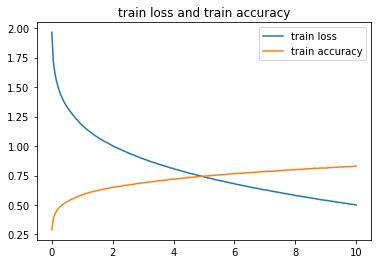

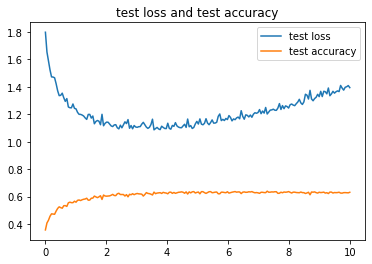

In [9]:

# get history data
epoth_x = np.linspace(0, 10, num_epochs, endpoint=True)
train_loss = cnn_history.history['loss']
train_accuracy = cnn_history.history['acc']
test_loss = cnn_history.history['val_loss']
test_accuracy = cnn_history.history['val_acc']

# plot train loss and accuracy
plt.figure() 
plt.plot(epoth_x, train_loss,label = 'train loss')
plt.plot(epoth_x,train_accuracy,label = 'train accuracy')
plt.title("train loss and train accuracy")
plt.legend()


# plot test loss and accuracy
plt.figure() 
plt.plot(epoth_x, test_loss, label = 'test loss')
plt.plot(epoth_x,test_accuracy, label = 'test accuracy')
plt.legend()
plt.title("test loss and test accuracy")


# get max train accuracy and test accuracy 
max_train_accuracy = np.max(cnn_history.history['acc'])
max_test_accuracy = np.max(cnn_history.history['val_acc'])
print("max train accuracy", max_train_accuracy)
print("max test accuracy", max_test_accuracy)